In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
bank = pd.read_csv('bank.csv', sep=';')

In [3]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.shape

(41188, 21)

In [5]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
# Primary Analysis of several categorical features

In [9]:
#EDA

# Mode of Contact

<Axes: xlabel='contact', ylabel='count'>

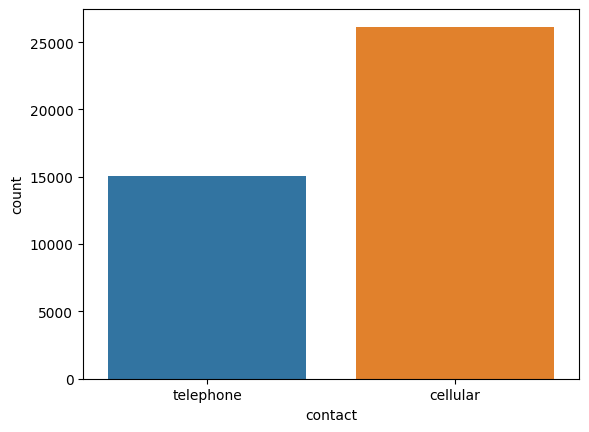

In [10]:
sns.countplot(x='contact', data=bank, hue='contact')

Customers are primarily contacted on cellular rather than telephone.

# Call Duration for the week

<Axes: xlabel='day_of_week', ylabel='duration'>

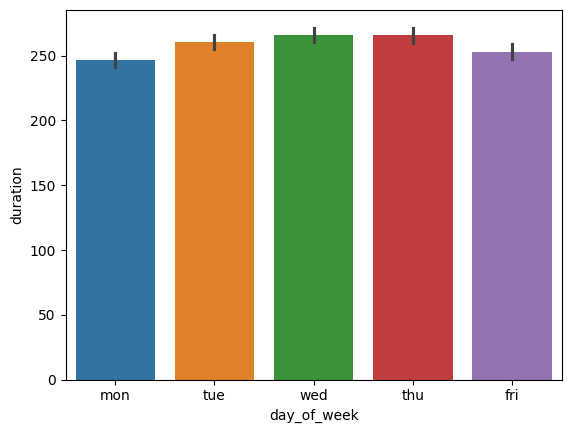

In [11]:
sns.barplot(x='day_of_week',y='duration',data=bank, hue='day_of_week')

Monday & Friday have least contact duration. Tue-Wed-Thu have more call duration with customers.

# Weekly Contact Duration on telephone & cellular respectively

<Axes: xlabel='contact', ylabel='duration'>

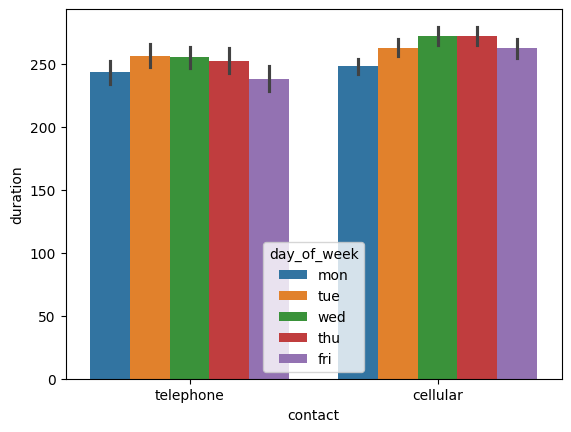

In [12]:
sns.barplot(x='contact',y='duration', data=bank, hue='day_of_week')

It is once again validated that the longest call duration with clients is remarkably on Tue-Wed-Thu.

# Lead conversion success based on contact mode & duration of contact

Current campaign:

<Axes: xlabel='contact', ylabel='duration'>

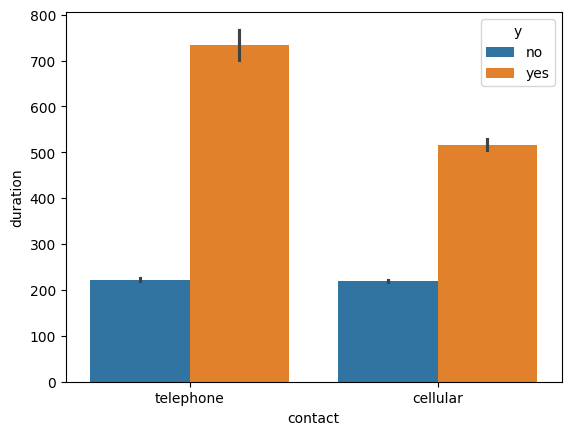

In [13]:
sns.barplot(x='contact',y='duration', data=bank, hue='y')

Previous campaign:

<Axes: xlabel='contact', ylabel='duration'>

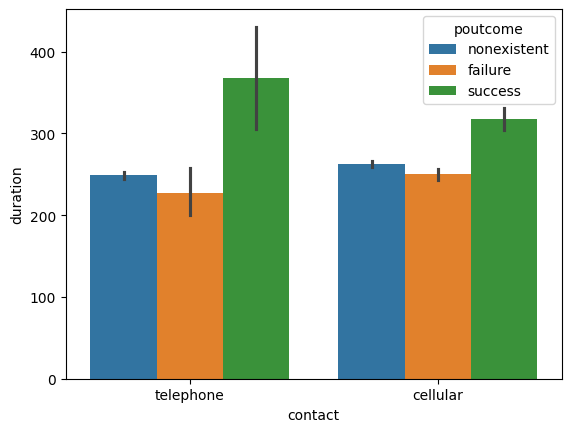

In [14]:
sns.barplot(x='contact',y='duration', data=bank, hue='poutcome')

In both the current & previous campaigns, if the call duration with the client was more irrespective of the contact mode, it is more likely that they are going to subscribe to the bank's term deposit. Also telephone contact is highly effective than cellular contact with regards to conversion success rate.

# Conversion Success on Weekdays

Current campaign:

<Axes: xlabel='day_of_week', ylabel='duration'>

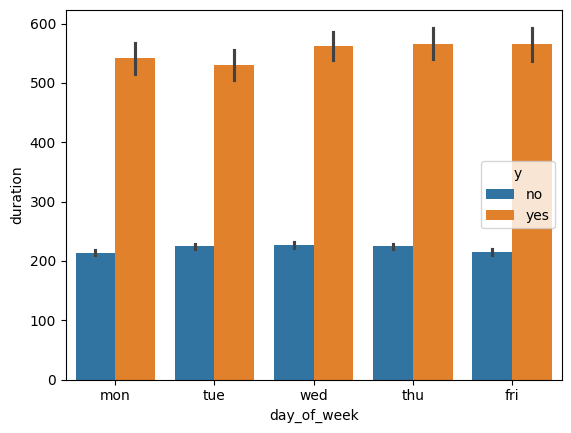

In [15]:
sns.barplot(x='day_of_week',y='duration' ,data=bank, hue='y')

In the current campaign, Term Deposit Subscriptions are more likely to be made on Wed-Thu-Fri as against Mon-Tue.

Previous campaign:

<Axes: xlabel='day_of_week', ylabel='duration'>

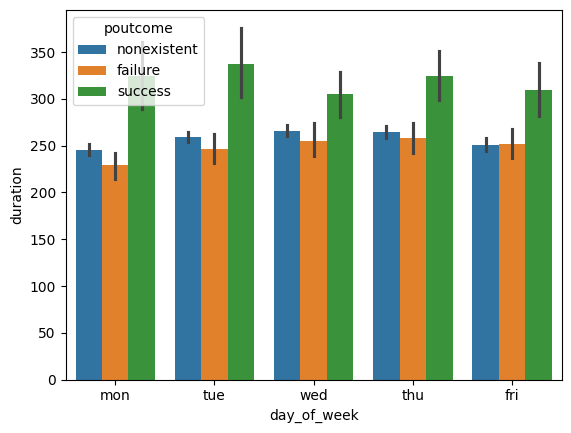

In [16]:
sns.barplot(x='day_of_week',y='duration' ,data=bank, hue='poutcome')

Term Deposit subscriptions were successfully made on Mon-Tue & Thu as against Wed & Fri in the previous campaign.

ON COMPARING THE ABOVE 2 CAMPAIGNS, WE FIND THURSDAYs TO BE HIGHLY CRUCIAL IN THE ENTIRE WEEK WHEN CUSTOMERS ON THAT DAY READILY SUBSCRIBE TO THE PRODUCT.

# Product response on a monthly basis:

Current campaign:

<Axes: xlabel='month', ylabel='duration'>

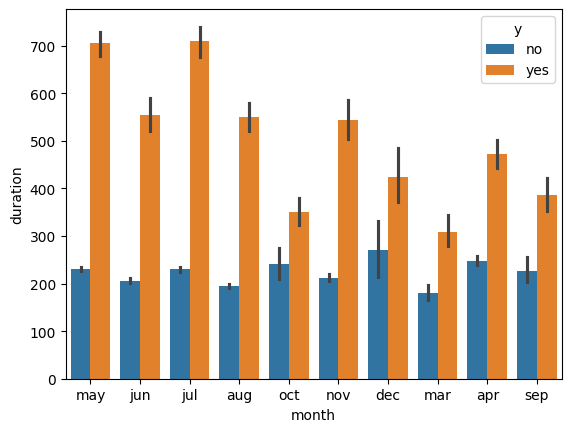

In [50]:
sns.barplot(x='month',y='duration' ,data=bank, hue='y')

For the current campaign, May-June-July-August & November are/were the favourable months where the highest subscriptions are found. March & October wer the highest losing months.

Previous campaign:

<Axes: xlabel='month', ylabel='duration'>

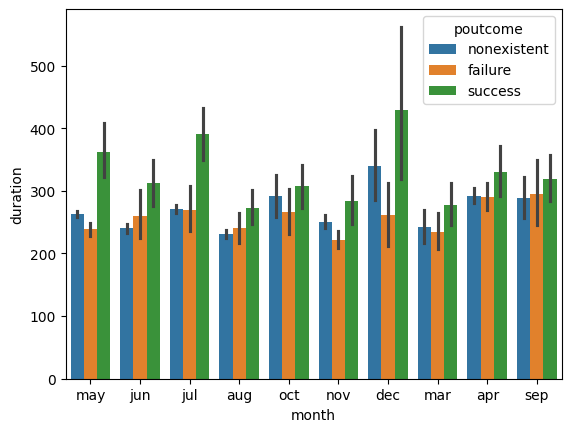

In [51]:
sns.barplot(x='month',y='duration' ,data=bank, hue='poutcome')

In the previous campaign, December was the highest gainer followed by July & May month. August & March months were the spoiler.

BOTH THE CAMPAIGNS SUGGEST THAT MARCH IS THE LEAST PERFORMING MONTH FOR THE BANK FROM THE CLIENT'S SUBSCRIPTION PERSPECTIVE.

MAY & JUNE MONTH ARE THE TOP GAINERS FOR BOTH THE CAMPAIGNS.

# Duration for which various job workers generally attend the call.

<Axes: xlabel='job', ylabel='duration'>

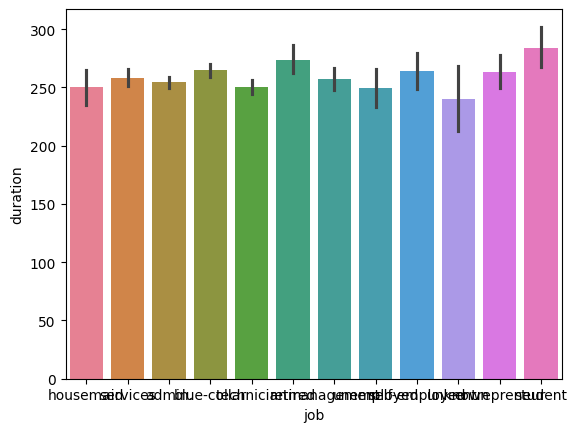

In [17]:
 sns.barplot(x='job',y='duration',data=bank, hue='job')

# 

# Count of clients having Personal Loan

<Axes: xlabel='loan', ylabel='count'>

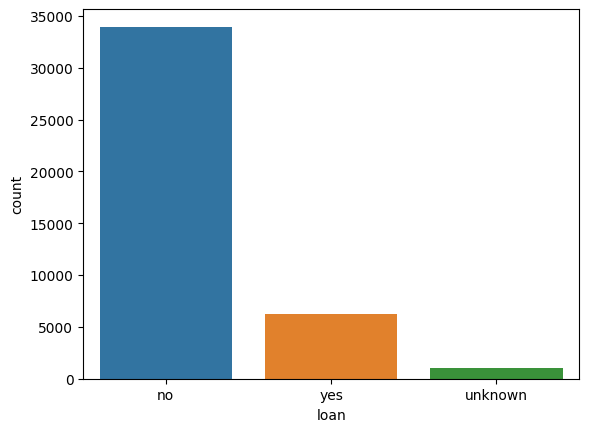

In [38]:
sns.countplot(x='loan',data=bank,hue='loan')

Majority of the clients don't have personal loan.

# Count of clients having Housing Loan

<Axes: xlabel='housing', ylabel='count'>

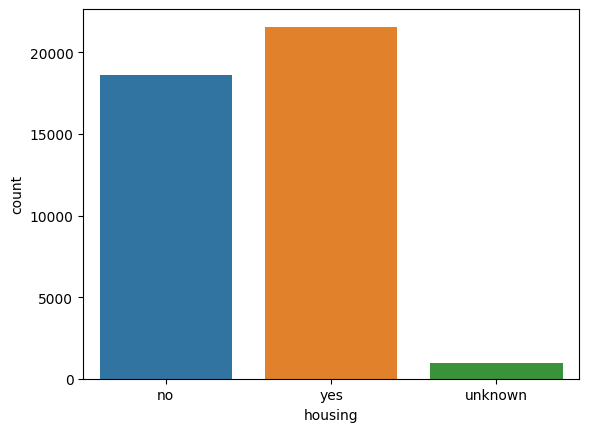

In [35]:
sns.countplot(x='housing', data=bank, hue='housing')

Majority of the clients have housing loan. Share of housing loan non-takers is also significant as per the charts.

OVERALL CLIENTS ARE HOUSING LOAN OWNERS FROM THE ABOVE ANALYSIS.

# Count of clients having default credit

<Axes: xlabel='default', ylabel='count'>

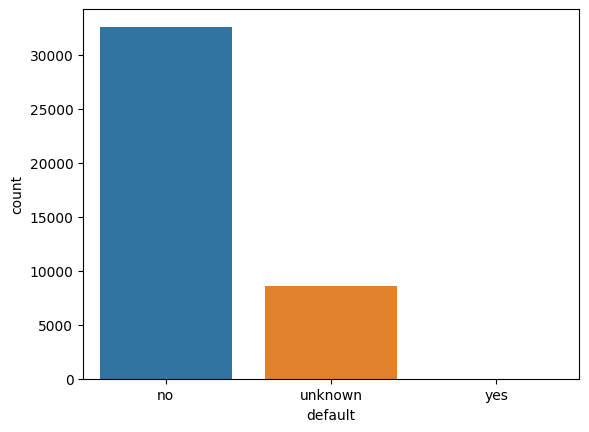

In [36]:
sns.countplot(x='default', data=bank, hue='default')

Majority do not have default credit. Yet a significant portion in the available dataset may or may not have default credit as per the plotted charts.

# Marital status of clients

<Axes: xlabel='marital', ylabel='count'>

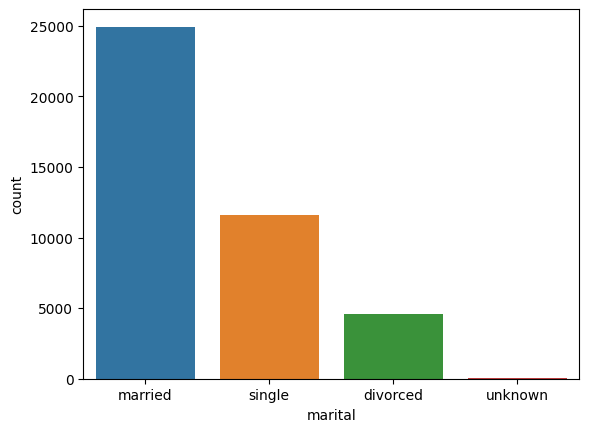

In [40]:
sns.countplot(x='marital', data=bank, hue='marital')

Majority of the clients are married followed by single and divorced.

# Marital Status wise Personal Loan takers 

<Axes: xlabel='marital', ylabel='count'>

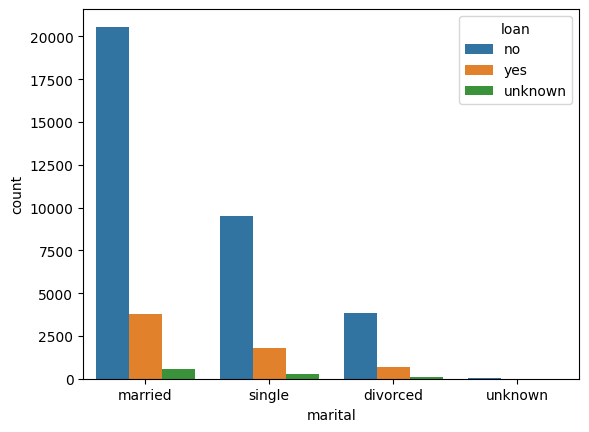

In [20]:
sns.countplot(x='marital',data=bank,hue='loan')

Majority of them irrespective of their marital status are non-takers of personal loan. And married ones are the highest loan takers & non-takers given to their large share in the client availability compared to the other client types.

# Marital Status wise Housing Loan holders

<Axes: xlabel='marital', ylabel='count'>

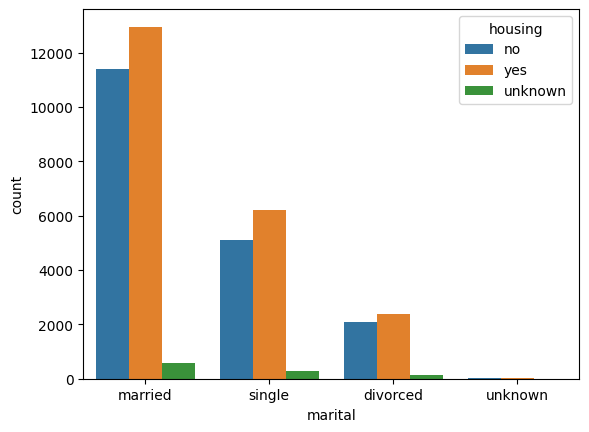

In [39]:
sns.countplot(x='marital',data=bank,hue='housing')

Housing loan takers are more than housing loan non-takers in each of the marital status category.

Once again proved that housing loan is very popular among the clients.

# Marital Status wise Default Credit holders

<Axes: xlabel='marital', ylabel='count'>

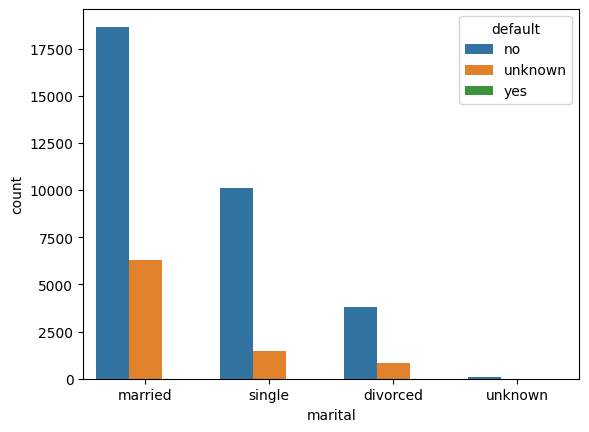

In [21]:
sns.countplot(x='marital',data=bank,hue='default')

The highest default credit holders/ non-holders are found for married clients followed by single, divorced and unknown status clients.

# Attented Call Duration based on marital status of clients

<Axes: xlabel='marital', ylabel='duration'>

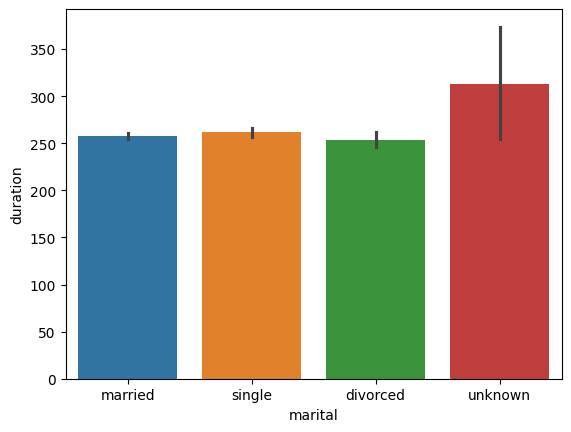

In [23]:
sns.barplot(x='marital',y='duration', data=bank, hue='marital')

Unknown status clients are found to be conversing for longer duration and divorced people the least. Negligible call duration difference is found between married and single status clients.

# Impact of Personal Loan on Product Subscription

Current campaign:

<Axes: xlabel='loan', ylabel='count'>

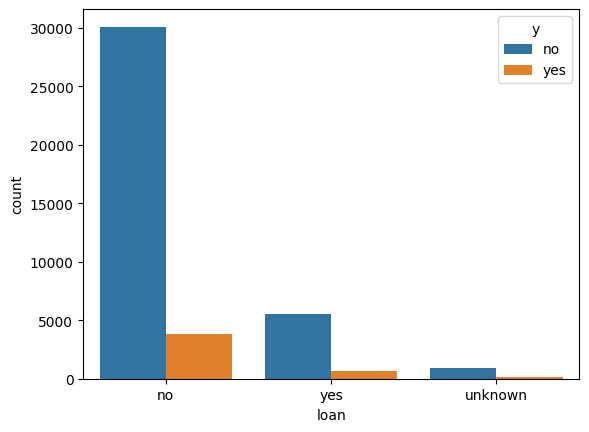

In [24]:
sns.countplot(x='loan',data=bank,hue='y')

Previous campaign:

<Axes: xlabel='loan', ylabel='count'>

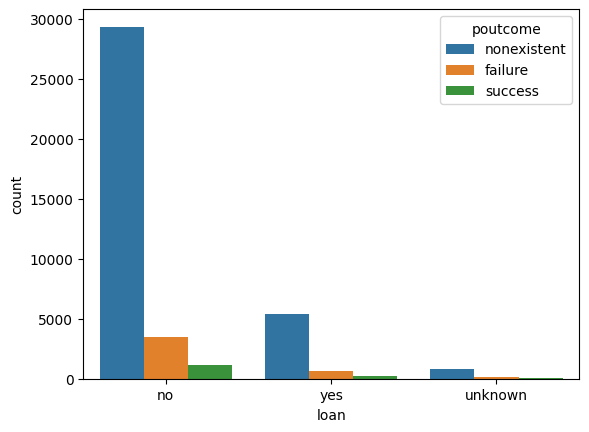

In [43]:
sns.countplot(x='loan',data=bank,hue='poutcome')

# Impact of Home Loan on Product Subscription

Current campaign:

<Axes: xlabel='housing', ylabel='count'>

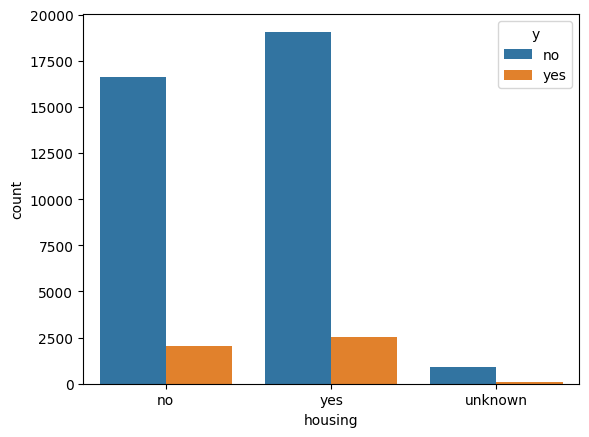

In [25]:
sns.countplot(x='housing',data=bank,hue='y')

Previous campaign:

<Axes: xlabel='housing', ylabel='count'>

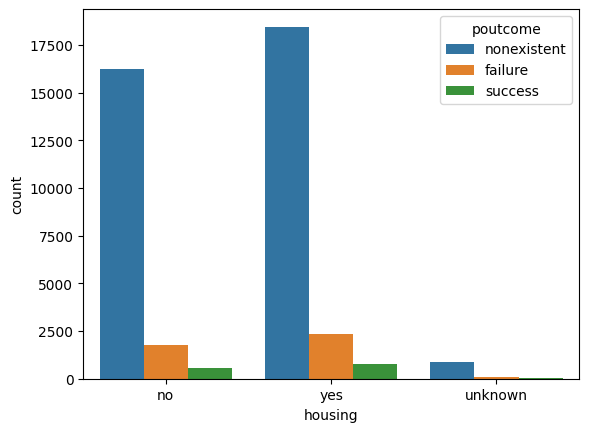

In [27]:
sns.countplot(x='housing',data=bank,hue='poutcome')

IT IS CLEARLY VISIBLE THAT IRRESPECTIVE OF THE LOAN TYPE & LOAN STATUS, CLIENTS ARE GENERALLY INCLINED TOWARDS THE OFFER REJECTION WHICH IS QUITE SUGGESTIVE FOR THE MARKETING CALLERS TO CONDUCT ACCORDINGLY.

# Marital Status wise Product Subscription

Current campaign:

<Axes: xlabel='marital', ylabel='duration'>

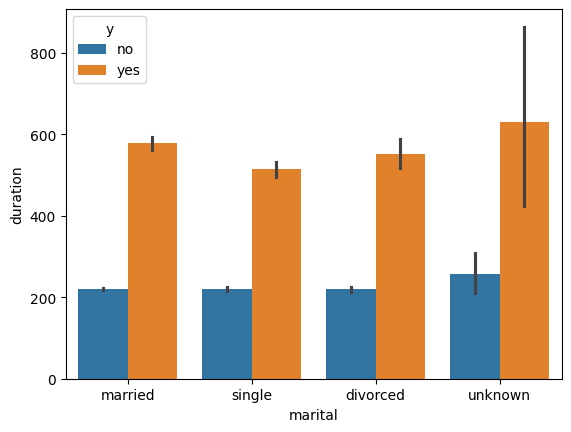

In [28]:
sns.barplot(x='marital',y='duration', data=bank, hue='y')

Previous campaign:

<Axes: xlabel='marital', ylabel='duration'>

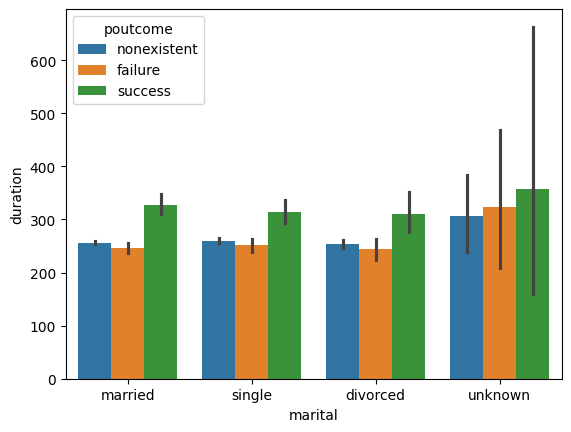

In [29]:
sns.barplot(x='marital',y='duration', data=bank, hue='poutcome')

Once again it is validated that irrespective of the marital status, if the call duration is higher, client is most likely to subscribe the product.

In the current campaign, married and unknown status clients are the top subscribers and the single status clients rock the bottom in comparison.

In the previous campaign, divorced people were the least to subscribe.

# Impact on the client's final decision due to the number of contacts made:

Current campaign:

<Axes: xlabel='y', ylabel='campaign'>

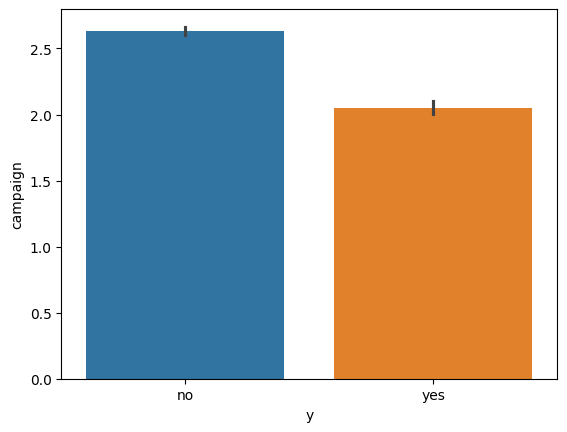

In [30]:
sns.barplot(x='y',y='campaign', data=bank, hue='y')

It is evident that if a client is called repetitively beyond a certain point in the current campaign, the client is most likely to reject the offering.

Previous campaign:

<Axes: xlabel='poutcome', ylabel='previous'>

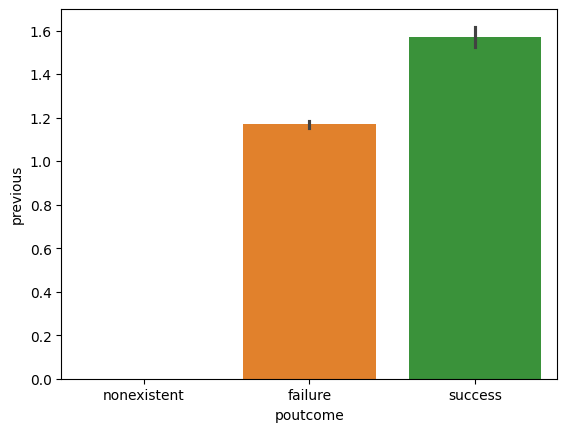

In [31]:
sns.barplot(x='poutcome',y='previous', data=bank, hue='poutcome')

On the other hand, if we look into the previous campaign, if a client was called repetitively, it was actually helping to succesfully convert the potent lead.

# Duration gap between 2 calls impacting the client's decision:

<Axes: xlabel='y', ylabel='pdays'>

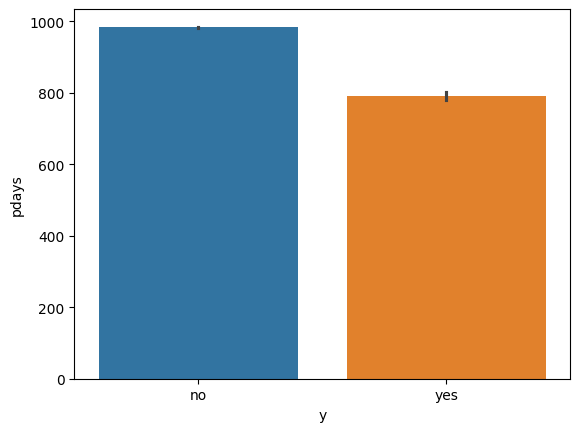

In [46]:
sns.barplot(x='y', y='pdays', data=bank, hue='y')

If the duration (in number of days) between the current and previous call is less, more chances that the client will be a subscriber.

# Conclusion

1. Most of the bank's clients are married and generally own a home loan.
2. While the overall tendency is to reject the offering on reaching the customer on call, if the customer converses for a        longer duration, there are higher chances of getting him/her converted into a successful lead. 
3. Single & divorced people converse for less duration as compared to married and unknown status people.
4. Call made on client's telephone works really well compared to call on client's cellular.
5. If the duration between the current call and the last call made to the client is less (in terms of number of days), higher      chances of success.
6. Impact of repetitive calls on client's final decision vary for both the campaigns. So no specific standards as such can be      set by the bank for their frequency of calls.
7. May & June are highly productive months for the bank in selling their deposit offering to the clients.
8. Thursday's are found to be highly effective in the entire weekdays schedule irrespective of the 2 campaigns for getting a        huge positive response for the bank's product.